In [1]:
!pip install hypernetx
import pandas as pd
import pickle

`We transformed the proteins (node ids) into integers to compute volume densest subhypergraphs (in c++).
vid_to_genename.map => maps the integer node ids (integer) to protein names (string). 
gene_to_vidmap.map => maps the protein names (string) to node ids integer
`

In [2]:
prefix = '../data/datasets/protein/'
vid_to_name_path = prefix+'vid_to_genename.map'
name_to_vid_path = prefix+'gene_to_vidmap.map'
humancomplexcsv = prefix+'allcomplexes.csv'
human_hyp = prefix + 'humancomplexes.hyp'
human_complexids = prefix + 'humancomplexes_complexIDs.txt'

`Some utility functions`

In [3]:
def load_dict(fname = 'tmp.pickle'):
    with open(fname, 'rb') as handle:
        b = pickle.load(handle)
        return b
def load_hg_ascsv(name):
    _list = []
    with open(name,'r') as f:
        for line in f:
            e = [int(i) for i in line.strip().split(',')]
            _list.append(e)
    return _list
def loadhypergraph(hypfile,edge_idfile,vid_togeneMap = vid_to_name_path):
    _dict = {}
    _idlist = []
    _map = load_dict(vid_to_name_path)
    with open(edge_idfile,'r') as f:
        _idlist = [int(_id.strip()) for _id in f]
    
    with open(hypfile,'r') as f:
        j = 0
        for edge in f:
            e = [_map[int(i)] for i in edge.strip().split(',')]
            _dict[_idlist[j]] = e
            j+=1
    return _dict
def retrieve_list_gene_name(lst_integer_id, vid_togeneMap = vid_to_name_path):
    _map = load_dict(vid_togeneMap)
    _tmp = []
    for integer_id in lst_integer_id:
        if integer_id not in _map:
            return None
        else:
            _tmp.append(_map[integer_id])
    return _tmp
def retrieve_stronglyinduced_complexes(lst_integer_id,human_hg):
    protein_complex_ids = []
    for key,value in human_hg.items():
        flag = True
        for u in value:
            if u not in lst_integer_id:
                flag = False
                break
        if flag:
            protein_complex_ids.append(key)
    return protein_complex_ids

`Load the human protein complexes csv curated from CORUM`

In [4]:
human_df = pd.read_csv(humancomplexcsv,sep=',')
human_df.head()

,Unnamed: 0,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,...,FunCat ID,FunCat description,subunits(Gene name),Subunits comment,PubMed ID,Complex comment,Disease comment,SWISSPROT organism,subunits(Gene name syn),subunits(Protein name)
0,0,1,BCL6-HDAC4 complex,Human,None,None,P41182;P56524,604;9759,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC4,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;KIAA0288,B-cell lymphoma 6 protein;Histone deacetylase 4
1,1,2,BCL6-HDAC5 complex,Human,None,None,P41182;Q9UQL6,604;10014,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC5,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;KIAA0600,B-cell lymphoma 6 protein;Histone deacetylase 5
2,2,3,BCL6-HDAC7 complex,Human,None,None,P41182;Q8WUI4,604;51564,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC7,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;HDAC7A,B-cell lymphoma 6 protein;Histone deacetylase 7
3,3,4,Multisubunit ACTR coactivator complex,Human,None,None,Q09472;Q92793;Q92831;Q9Y6Q9,2033;1387;8850;8202,MI:0004-affinity chromatography technologies;M...,GO:0045893;GO:0023052;GO:0005634,...,11.02.03.04.01;30.01;70.10,transcription activation;cellular signalling;n...,EP300;CREBBP;KAT2B;NCOA3,None,9267036,Cofactor ACTR binds directly nuclear receptors...,None,Homo sapiens (Human);Homo sapiens (Human);Homo...,"P300;CBP;PCAF;AIB1, BHLHE42, RAC3, TRAM1, ACTR",Histone acetyltransferase p300;CREB-binding pr...
4,5,10,Condensin I complex,Human,13S condensin complex,None,O95347;Q15003;Q15021;Q9BPX3;Q9NTJ3,10592;23397;9918;64151;10051,MI:0004-affinity chromatography technologies;M...,GO:0000279;GO:0007067;GO:0030261;GO:0007059;GO...,...,10.03.01.01.11;10.03.04.03;10.03.04.05;42.10.0...,M phase;chromosome condensation;chromosome seg...,SMC2;NCAPH;NCAPD2;NCAPG;SMC4,None,11136719,None,None,Homo sapiens (Human);Homo sapiens (Human);Homo...,CAPE SMC2L1;BRRN BRRN1 CAPH KIAA0074;CAPD2 CNA...,Structural maintenance of chromosomes protein ...


`
Load human protein complex hypergraph as a dict
humancomplexes.hyp => hypergraph of protein complexes
humancomplexes_complexIDs.txt => name of the protein complexes
`

In [5]:
vid_to_genename_map = load_dict(vid_to_name_path)
gene_to_vidmap = load_dict(name_to_vid_path)
human_hg = loadhypergraph(human_hyp, human_complexids, vid_to_name_path)

`Load the nodes in the volume densest subhypergraph and extract induced subhypergraph.
This subhypergraph is the volume densest subhypergraph that we analyze`

In [6]:
vol_d = '../output/density/protein_nbr.csv'
vol_dhg = load_hg_ascsv(vol_d)

nodes_volD = set()
for e in vol_dhg:
    for u in e:
        nodes_volD.add(u)

coreprotein_names = retrieve_list_gene_name(nodes_volD)
sub_complexes_volD = retrieve_stronglyinduced_complexes(coreprotein_names, human_hg)
print('volume-Densest sub-protein complexes: ')
print(sub_complexes_volD)

volume-Densest sub-protein complexes: 
[351, 763, 770, 774, 775, 1195, 1261, 1734, 1743, 2833, 6072, 6073, 6160]


`Extract protein complex names (hyperedge ids) in the volume densest subhypergraph `

In [8]:
v_densestE = []
for e in vol_dhg:
    new_e = retrieve_list_gene_name(e)
    v_densestE.append(new_e)
# print(v_densestE)

`Plot the densest subhypergraph`

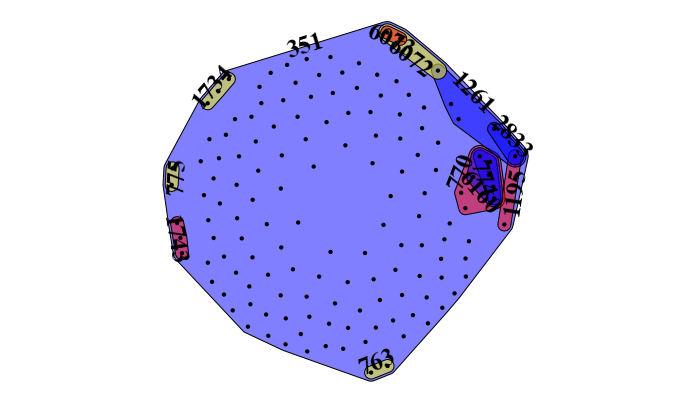

In [21]:
import numpy as np
import sys, path, os
import random

import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
scenes = {i: v_densestE[i] for i in range(len(v_densestE))}
labels = {}
j = 0
for i,row in human_df[(human_df.ComplexID.isin(sub_complexes_volD))].iterrows():
    labels[j] = row['ComplexID']
    j+=1
# print(labels)
H = hnx.Hypergraph(scenes)

font = {
        'family': 'Times New Roman',
        'weight': 'bold',
        'size': 20
        }
plt.rc('font',**font)
alpha = .5

fig, ax1 = plt.subplots(figsize = (10,6))

edge_d = {'fontsize':25}
hnx.draw(H, ax = ax1,
                 label_alpha=0,
                 edges_kwargs={
                     'facecolors': [(0,0,1,alpha),  (1, 1, 0, alpha), (1,0,0, alpha)],
                     'edgecolors': 'black',
                     'linewidths': 1
                 },
                 nodes_kwargs = {
                     'facecolors': (0,0,0,1)
                },
                layout_kwargs = {'seed': 17},
                with_edge_labels = True, 
                with_node_labels = False,
                node_radius = 0.5,
                edge_labels = labels,
                edge_labels_kwargs = edge_d
        )
plt.tight_layout()
plt.savefig('protein.pdf')
plt.show()